Opening Data

This script describes customer's behaviour by analysing users subscription to the two plans of megaline. It also shows the revenues generated via each plan.

## Step 1. Open the data file and study the general information

In [8]:
# Import the files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

from numpy import mean
from numpy import std

megaline_calls = pd.read_csv('C:/Users/hvm/Documents/Practicum/Statistical Data Analysis/Stat_Project/megaline_calls.csv')
megaline_internet = pd.read_csv('C:/Users/hvm/Documents/Practicum/Statistical Data Analysis/Stat_Project/megaline_internet.csv')
megaline_messages = pd.read_csv('C:/Users/hvm/Documents/Practicum/Statistical Data Analysis/Stat_Project/megaline_messages.csv')
megaline_plans = pd.read_csv('C:/Users/hvm/Documents/Practicum/Statistical Data Analysis/Stat_Project/megaline_plans.csv')
megaline_users = pd.read_csv('C:/Users/hvm/Documents/Practicum/Statistical Data Analysis/Stat_Project/megaline_users.csv')

## Step 2. Prepare the data


In [9]:
megaline_calls['user_id'] = megaline_calls['user_id'].astype('int32')
megaline_calls['call_date'] = pd.to_datetime(megaline_calls['call_date'])
megaline_calls['duration'] = megaline_calls['duration'].astype('float32')

megaline_internet['user_id'] = megaline_internet['user_id'].astype('int32')
megaline_internet['session_date'] = pd.to_datetime(megaline_internet['session_date'])

megaline_messages['user_id'] = megaline_messages['user_id'].astype('int32')
megaline_messages['message_date'] = pd.to_datetime(megaline_messages['message_date'])

- call_date, session_date, message_date changed to date_time
- duration and user_ids sizes reduced to int32

In [10]:

#cREATE MONTHS COLUMNS
megaline_calls['call_date_month'] = megaline_calls['call_date'].dt.month

megaline_internet['session_date_month'] = megaline_internet['session_date'].dt.month

megaline_messages['message_date_month'] = megaline_messages['message_date'].dt.month

In [11]:
megaline_users['churn_date'].isnull().sum()

466

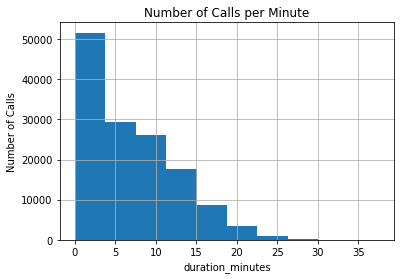

id                 26834
user_id            26834
call_date          26834
duration           26834
call_date_month    26834
dtype: int64

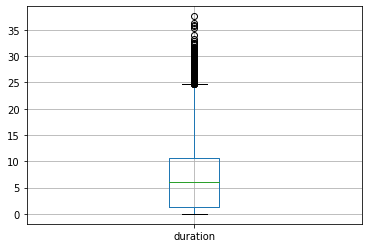

In [12]:
megaline_calls['duration'].hist().set(
    xlabel="duration_minutes", ylabel="Number of Calls", title = "Number of Calls per Minute")
plt.show()
megaline_calls.boxplot(column ='duration')

megaline_calls.query('duration == 0').count()

The histgram shows that there is abnormally high about of 0 calls which isn't realistic.
The boxplot shows that beyond 25 minutes, there are some outliers till abve 35 minutes. But most calls are between zero and 10 minutes.

In [13]:
#filter out 0 minutes calls. 
print(megaline_calls.info())
megaline_calls = megaline_calls.query('duration > 0')
print(megaline_calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               137735 non-null  object        
 1   user_id          137735 non-null  int32         
 2   call_date        137735 non-null  datetime64[ns]
 3   duration         137735 non-null  float32       
 4   call_date_month  137735 non-null  int64         
dtypes: datetime64[ns](1), float32(1), int32(1), int64(1), object(1)
memory usage: 4.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 110901 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               110901 non-null  object        
 1   user_id          110901 non-null  int32         
 2   call_date        110901 non-null  datetime64[ns]
 3   duration         110901 non-nul

26834 rows removed because they have 0 minute call which isn't realistic. they are most likely missed calls.

In [14]:
megaline_calls_pivot = megaline_calls.pivot_table(
    index = 'call_date_month', values = ['duration'], aggfunc =['sum','count'])
megaline_calls_pivot = megaline_calls_pivot.reset_index()
megaline_calls_pivot.columns = ['call_date_month','sum_duration','count_calls']

Converted the pivot table to dataframe and named the columns properly

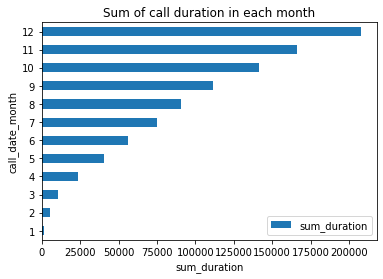

[Text(0.5, 0, 'count_calls'),
 Text(0, 0.5, 'call_date_month'),
 Text(0.5, 1.0, 'Number of calls in each month')]

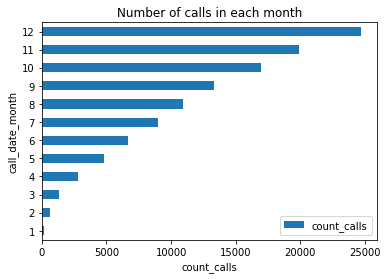

In [15]:
megaline_calls_pivot.plot.barh(
    x = 'call_date_month', y ='sum_duration').set(
    xlabel="sum_duration", ylabel="call_date_month", title = "Sum of call duration in each month")
plt.show()
megaline_calls_pivot.plot.barh(
    x = 'call_date_month', y ='count_calls').set(
    xlabel="count_calls", ylabel="call_date_month", title = "Number of calls in each month")

There is a steady increase in number of calls and sum of the call duration from January to December.

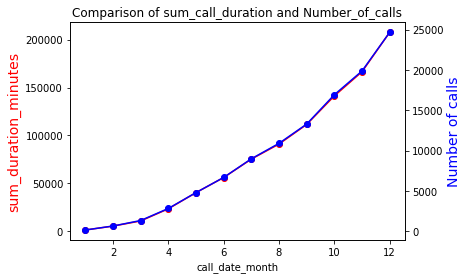

In [16]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(megaline_calls_pivot.call_date_month, megaline_calls_pivot.sum_duration, color="red", marker="o")
# set x-axis label
ax.set_xlabel("call_date_month")
# set y-axis label
ax.set_ylabel("sum_duration_minutes",color="red",fontsize=14)


# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(megaline_calls_pivot.call_date_month, megaline_calls_pivot.count_calls,color="blue",marker="o")
ax2.set_ylabel("Number of calls",color="blue",fontsize=14)
ax.set_title('Comparison of sum_call_duration and Number_of_calls')
plt.show()

In [17]:
megaline_messages.head()

,id,user_id,message_date,message_date_month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


Near perfect correlation is seen for sum_call_duration and Number_of_calls from January through December.

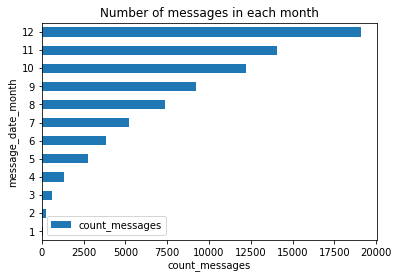

In [18]:
megaline_messages_pivot = megaline_messages.pivot_table(index = 'message_date_month', values = ['id'], aggfunc =['count'])
megaline_messages_pivot = megaline_messages_pivot.reset_index()
megaline_messages_pivot.columns = ['message_date_month','count_messages']
megaline_messages_pivot.plot.barh(
    x = 'message_date_month', y ='count_messages').set(
    xlabel="count_messages", ylabel="message_date_month", title = "Number of messages in each month")
plt.show()

Increase of messages from January to december

[Text(0.5, 0, 'session_date_month'),
 Text(0, 0.5, 'sum_mb_used'),
 Text(0.5, 1.0, 'Sum of mb used in each month')]

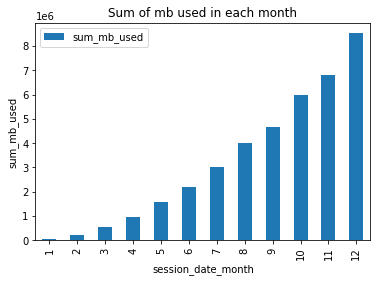

In [19]:
megaline_internet_pivot = megaline_internet.pivot_table(index = 'session_date_month', values = 'mb_used', aggfunc ='sum')
megaline_internet_pivot = megaline_internet_pivot.reset_index()
megaline_internet_pivot.columns = ['session_date_month','sum_mb_used']
megaline_internet_pivot.plot.bar(
    x = 'session_date_month', y ='sum_mb_used').set(
    xlabel="session_date_month", ylabel="sum_mb_used", title = "Sum of mb used in each month")

Steady increase in mb consumption from January to December

The monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan)

In [20]:
megaline_calls_grouped = megaline_calls.pivot_table(
    index = ['user_id','call_date_month'], values =['duration', 'id'] , aggfunc={'duration' : 'sum', 'id' : 'count'})

megaline_calls_grouped.head()

duration  id
user_id call_date_month                
1000    12               116.830002  16
1001    8                171.139999  22
        9                297.690002  38
        10               374.109985  47
        11               404.589996  49

Grouping by months and converting to datatframe

In [21]:
megaline_calls_grouped = megaline_calls.groupby(
    by = ['user_id','call_date_month'])['duration'].sum().to_frame(name = 'duration').reset_index()

megaline_messages_grouped = megaline_messages.groupby(
    by = ['user_id','message_date_month'])['id'].count().to_frame(name = 'count_messages').reset_index()

megaline_internet_grouped = megaline_internet.groupby(
    by = ['user_id','session_date_month'])['mb_used'].sum().to_frame(name = 'sum_mb_used').reset_index()

In [22]:
megaline_grouped_all = pd.merge((pd.merge(
    megaline_calls_grouped, megaline_internet_grouped, 
    how='outer', left_on=['user_id','call_date_month'], 
    right_on = ['user_id','session_date_month'])), 
    megaline_messages_grouped, how='outer', 
    left_on=['user_id','call_date_month'], 
    right_on = ['user_id','message_date_month'])

megaline_grouped_all.head()


,user_id,call_date_month,duration,session_date_month,sum_mb_used,message_date_month,count_messages
0,1000,12.0,116.830002,12.0,1901.47,12.0,11.0
1,1001,8.0,171.139999,8.0,6919.15,8.0,30.0
2,1001,9.0,297.690002,9.0,13314.82,9.0,44.0
3,1001,10.0,374.109985,10.0,22330.49,10.0,53.0
4,1001,11.0,404.589996,11.0,18504.30,11.0,36.0


To get the plan whether surf or ultimate, merge grouped tables with megaline_users table using user_id

In [23]:
megaline_grouped_all = megaline_grouped_all.merge(megaline_users[['user_id','plan']], on ='user_id')

megaline_grouped_all= megaline_grouped_all[['user_id','plan','call_date_month','duration','sum_mb_used','count_messages']]

megaline_grouped_all.columns = ['user_id','plan','month','duration','sum_mb_used','count_messages']


In [24]:
surf_message_limit = megaline_plans.query("plan_name == 'surf'")['messages_included']
surf_mb_limit = megaline_plans.query("plan_name == 'surf'")['mb_per_month_included']/1024
surf_call_limit = megaline_plans.query("plan_name == 'surf'")['minutes_included']

surf_usd_per_message = megaline_plans.query("plan_name == 'surf'")['usd_per_message']
surf_usd_per_gb = megaline_plans.query("plan_name == 'surf'")['usd_per_gb']
surf_usd_per_minute = megaline_plans.query("plan_name == 'surf'")['usd_per_minute']

ultimate_message_limit = megaline_plans.query("plan_name == 'ultimate'")['messages_included']
ultimate_mb_limit = megaline_plans.query("plan_name == 'ultimate'")['mb_per_month_included']/1024
ultimate_call_limit = megaline_plans.query("plan_name == 'ultimate'")['usd_per_minute']

ultimate_usd_per_message = megaline_plans.query("plan_name == 'ultimate'")['usd_per_message']
ultimate_usd_per_minute = megaline_plans.query("plan_name == 'ultimate'")['usd_per_minute']
ultimate_usd_per_gb = megaline_plans.query("plan_name == 'ultimate'")['usd_per_gb']

 
surf_monthly_pay = megaline_plans.query("plan_name == 'surf'")['usd_monthly_pay']
ultimate_monthly_pay = megaline_plans.query("plan_name == 'ultimate'")['usd_monthly_pay']


In [25]:
def call_cost(row):
    if row['plan'] == 'surf' and row['duration'] > surf_call_limit.iloc[0]:
        return (row['duration'] - surf_call_limit.iloc[0]) * surf_usd_per_minute.iloc[0] + surf_monthly_pay.iloc[0]
    elif row['plan'] == 'ultimate' and row['duration'] > ultimate_call_limit.iloc[0]:
        return (row['duration'] - 
            ultimate_call_limit.iloc[0]) * ultimate_usd_per_minute.iloc[0] + ultimate_monthly_pay.iloc[0]
    elif row['plan'] == 'surf' and row['duration'] <= surf_call_limit.iloc[0]:
        return surf_monthly_pay.iloc[0]
    elif row['plan'] == 'ultimate' and row['duration'] <= ultimate_call_limit.iloc[0]:
        return ultimate_monthly_pay.iloc[0]
    else:
        return 0
    
megaline_grouped_all['call_cost'] = megaline_grouped_all[['plan','duration']].apply(lambda row : call_cost(row), axis=1)

print(megaline_grouped_all.head(5))

   user_id      plan  month    duration  sum_mb_used  count_messages  \
0     1000  ultimate   12.0  116.830002      1901.47            11.0   
1     1001      surf    8.0  171.139999      6919.15            30.0   
2     1001      surf    9.0  297.690002     13314.82            44.0   
3     1001      surf   10.0  374.109985     22330.49            53.0   
4     1001      surf   11.0  404.589996     18504.30            36.0   

   call_cost  
0    71.1682  
1    20.0000  
2    20.0000  
3    20.0000  
4    20.0000  


In [26]:
def message_cost(row):
    if row['plan'] == 'surf' and row['count_messages'] > surf_message_limit.iloc[0]:
        return (row['count_messages'] - 
                surf_message_limit.iloc[0]) * surf_usd_per_message.iloc[0] + surf_monthly_pay.iloc[0]
    elif row['plan'] == 'ultimate' and row['count_messages'] > ultimate_message_limit.iloc[0]:
        return (row['count_messages'] - 
                ultimate_message_limit.iloc[0]) * ultimate_usd_per_message.iloc[0] + ultimate_monthly_pay.iloc[0]
    elif row['plan'] == 'surf' and row['count_messages'] <= surf_message_limit.iloc[0]:
        return surf_monthly_pay.iloc[0]
    elif row['plan'] == 'ultimate' and row['count_messages'] <= ultimate_message_limit.iloc[0]:
        return ultimate_monthly_pay.iloc[0]
    else:
        return 0
    
megaline_grouped_all['message_cost'] = megaline_grouped_all[['plan','count_messages']].apply(
    lambda row : message_cost(row), axis=1)
print(megaline_grouped_all.head(5))

   user_id      plan  month    duration  sum_mb_used  count_messages  \
0     1000  ultimate   12.0  116.830002      1901.47            11.0   
1     1001      surf    8.0  171.139999      6919.15            30.0   
2     1001      surf    9.0  297.690002     13314.82            44.0   
3     1001      surf   10.0  374.109985     22330.49            53.0   
4     1001      surf   11.0  404.589996     18504.30            36.0   

   call_cost  message_cost  
0    71.1682         70.00  
1    20.0000         20.00  
2    20.0000         20.00  
3    20.0000         20.09  
4    20.0000         20.00  


In [27]:
def internet_cost(row):
    if row['plan'] == 'surf' and row['sum_mb_used'] > surf_mb_limit.iloc[0]:
        return np.ceil((row['sum_mb_used'] - surf_mb_limit.iloc[0])/1024) * surf_usd_per_gb.iloc[0] + surf_monthly_pay.iloc[0]
    elif row['plan'] == 'ultimate' and row['sum_mb_used'] > ultimate_mb_limit.iloc[0]:
        return np.ceil((row['sum_mb_used'] - 
                ultimate_mb_limit.iloc[0])/1024) * ultimate_usd_per_gb.iloc[0] + ultimate_monthly_pay.iloc[0]
    elif row['plan'] == 'surf' and row['sum_mb_used'] <= surf_mb_limit.iloc[0]:
        return surf_monthly_pay.iloc[0]
    elif row['plan'] == 'ultimate' and row['sum_mb_used'] <= ultimate_mb_limit.iloc[0]:
        return ultimate_monthly_pay.iloc[0]
    else:
        return 0
    
megaline_grouped_all['internet_cost'] = megaline_grouped_all[['plan','sum_mb_used']].apply(
    lambda row : internet_cost(row), axis=1)

print(megaline_grouped_all.head(5))


   user_id      plan  month    duration  sum_mb_used  count_messages  \
0     1000  ultimate   12.0  116.830002      1901.47            11.0   
1     1001      surf    8.0  171.139999      6919.15            30.0   
2     1001      surf    9.0  297.690002     13314.82            44.0   
3     1001      surf   10.0  374.109985     22330.49            53.0   
4     1001      surf   11.0  404.589996     18504.30            36.0   

   call_cost  message_cost  internet_cost  
0    71.1682         70.00           84.0  
1    20.0000         20.00           90.0  
2    20.0000         20.00          150.0  
3    20.0000         20.09          240.0  
4    20.0000         20.00          210.0  


In [28]:
megaline_grouped_all['total_revenue'] = megaline_grouped_all[
    'call_cost'] + megaline_grouped_all['message_cost'] + megaline_grouped_all['internet_cost']

-after you calculated month in each dataframe and made grouping - join dataframes (calls, messages, internet and tariff) into the huge one, you'll get smthg like client/month/tariff/calls/mesages/internet

-change your fucntions to calculate revenue for each cost (revenue = cost_qty * cost_price) and apply them to get client/month/tariff/calls/mesages/internet/calls_cost/mesages_cost/internet_cost/monthly_charge/total_per_month

-for both plans now you can make plots with amount of each cost by months, revenue from cost, totals and whatever you like

try to determine hypothesis from the task (see in brief) and check them
- write a conclusion about the data you explored and test completed
- submit the project =)

## Step 3. Analyze the data

In [29]:
megaline_grouped_all.head()

,user_id,plan,month,duration,sum_mb_used,count_messages,call_cost,message_cost,internet_cost,total_revenue
0,1000,ultimate,12.0,116.830002,1901.47,11.0,71.1682,70.00,84.0,225.1682
1,1001,surf,8.0,171.139999,6919.15,30.0,20.0000,20.00,90.0,130.0000
2,1001,surf,9.0,297.690002,13314.82,44.0,20.0000,20.00,150.0,190.0000
3,1001,surf,10.0,374.109985,22330.49,53.0,20.0000,20.09,240.0,280.0900
4,1001,surf,11.0,404.589996,18504.30,36.0,20.0000,20.00,210.0,250.0000


In [30]:
megaline_average = megaline_grouped_all.pivot_table(
    index = ['user_id','plan'], values = 
    ['duration','sum_mb_used','count_messages', 'call_cost','message_cost','internet_cost','total_revenue'], aggfunc = 
    'mean')

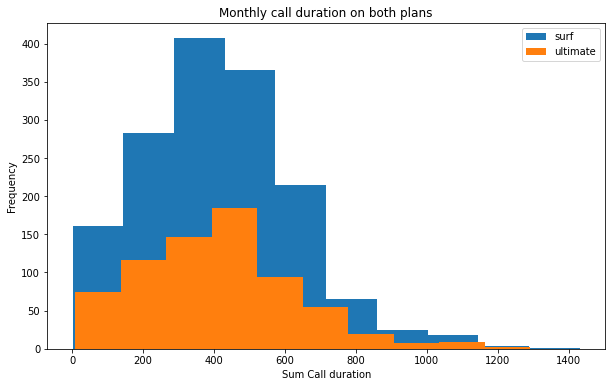

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


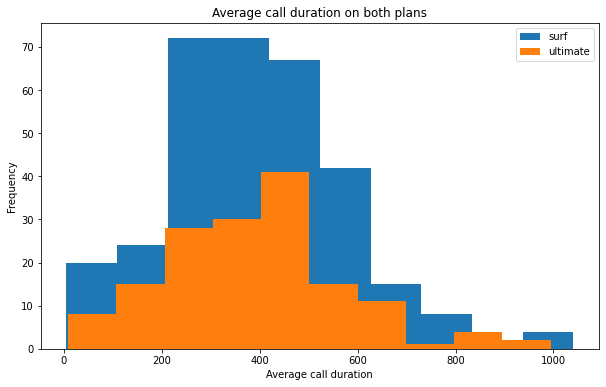

In [31]:
megaline_grouped_all.query('plan == "surf"')['duration'].plot.hist(label = 'surf')
megaline_grouped_all.query('plan == "ultimate"')['duration'].plot.hist(label='ultimate',
    figsize=(10,6)).set(xlabel= "Sum Call duration",  title = "Monthly call duration on both plans")
plt.legend()
plt.show()

megaline_average.query('plan == "surf"')['duration'].plot.hist(label = 'surf')
megaline_average.query('plan == "ultimate"')['duration'].plot.hist(
    label = 'ultimate', figsize=(10,6)).set(xlabel="Average call duration",  title = "Average call duration on both plans")
plt.legend()
megaline_plans.head()

Most surf users spend an average between 200 and 500 mins with a peak between 200 and 400 mins. Relatively fewer users under the surf plan spend beyond 600 mins.
Ultimate users average between 200 and 500 mins similarly but most are between 400 and 500 mins

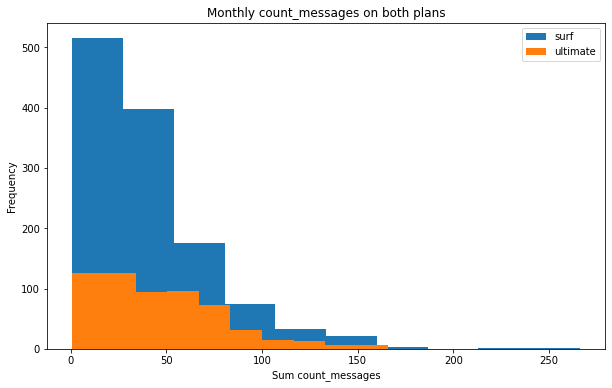

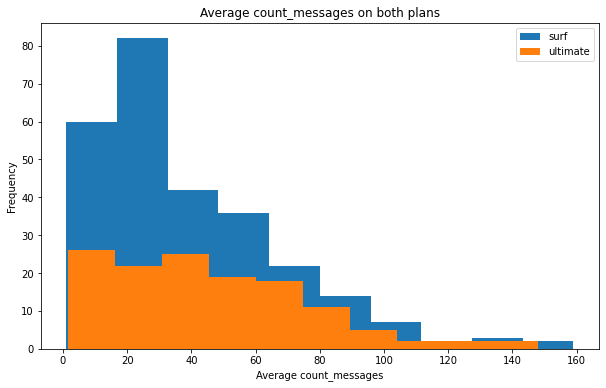

In [32]:
megaline_grouped_all.query('plan == "surf"')['count_messages'].plot.hist(label = 'surf')
megaline_grouped_all.query('plan == "ultimate"')['count_messages'].plot.hist(label='ultimate',
    figsize=(10,6)).set(xlabel= "Sum count_messages",  title = "Monthly count_messages on both plans")
plt.legend()
plt.show()

megaline_average.query('plan == "surf"')['count_messages'].plot.hist(label = 'surf')
megaline_average.query('plan == "ultimate"')['count_messages'].plot.hist(
    label = 'ultimate', figsize=(10,6)).set(xlabel="Average count_messages",  title = "Average count_messages on both plans")
plt.legend()

Surf users send messages 160 but mostly betwen 20 and 30 messages.

Ultimate users send mostly between 0 and 80 messages. 

Surf plan will generate more revenue because most of the users exceed the montly 50 messges limit.

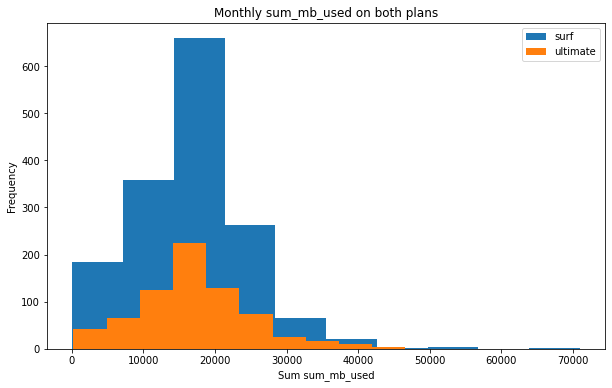

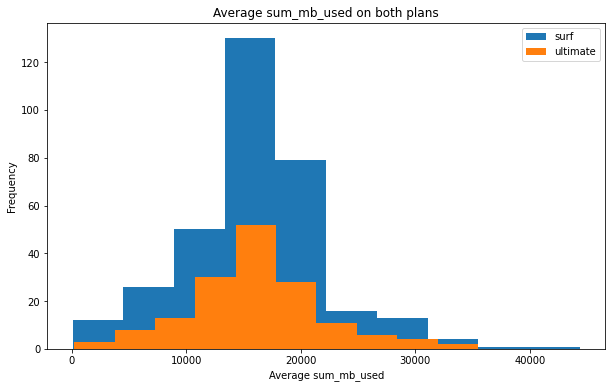

In [33]:
megaline_grouped_all.query('plan == "surf"')['sum_mb_used'].plot.hist(label = 'surf')
megaline_grouped_all.query('plan == "ultimate"')['sum_mb_used'].plot.hist(label='ultimate',
    figsize=(10,6)).set(xlabel= "Sum sum_mb_used",  title = "Monthly sum_mb_used on both plans")
plt.legend()
plt.show()

megaline_average.query('plan == "surf"')['sum_mb_used'].plot.hist(label = 'surf')
megaline_average.query('plan == "ultimate"')['sum_mb_used'].plot.hist(
    label = 'ultimate', figsize=(10,6)).set(xlabel="Average sum_mb_used",  title = "Average sum_mb_used on both plans")
plt.legend()

Both surf and ultimate plan have the most users between 10000 and 30000 mb monthly. However, there are more surf users than ultimate users. 

There are a few outliers using as much as 50000 and 70000 mb monthly under the surf plan but ultimate users don't go beyond the 50000 mb limit. 

This is very realistic because ultimate users have double the mb of surf users on a monthly plan. Hence, they need no further subscription. 

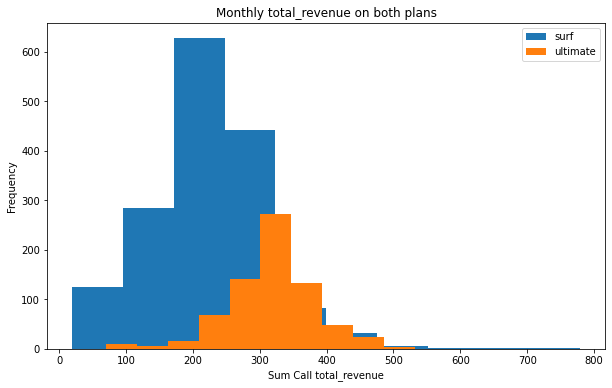

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


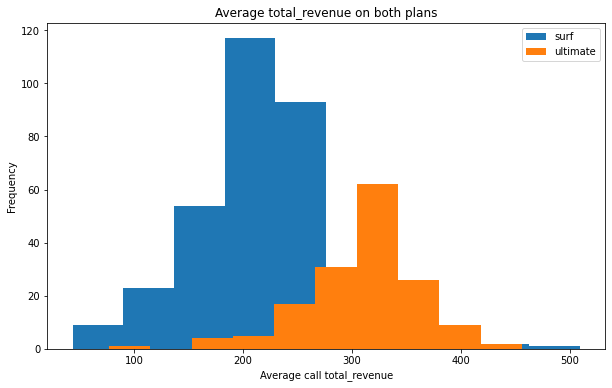

In [34]:
megaline_grouped_all.query('plan == "surf"')['total_revenue'].plot.hist(label = 'surf')
megaline_grouped_all.query('plan == "ultimate"')['total_revenue'].plot.hist(label='ultimate',
    figsize=(10,6)).set(xlabel= "Sum Call total_revenue",  title = "Monthly total_revenue on both plans")
plt.legend()
plt.show()

megaline_average.query('plan == "surf"')['total_revenue'].plot.hist(label = 'surf')
megaline_average.query('plan == "ultimate"')['total_revenue'].plot.hist(
    label = 'ultimate', figsize=(10,6)).set(
    xlabel="Average call total_revenue",  title = "Average total_revenue on both plans")
plt.legend()
megaline_plans.head()

the average revenue on the ultimate plan is higher than that of surf users .

Both ultimate and surf users use less than 500 minutes a month.

Research/Alternative Hypothesis

1. The average revenue from users of Ultimate and Surf calling plans differs.
2. The average revenue from users in NY-NJ area is different from that of the users from other regions.

1. Alternative Hypothesis --> $H_{A}$ : Average revenue for ultimate and surf plan differ. $μ_{ultimate}$ != $μ_{surf}$ 


   Null Hypothesis --> $H_{0}$: Average revenue for ultimate and surf plan are equal. $μ_{ultimate}$ = $μ_{surf}$
   
   
2. Alternative Hypothesis --> $H_{A}$ : Average revenue for NY-NJ and other regions differ. $μ_{NY-NJ}$ != $μ_{other}$ 


   Null Hypothesis --> $H_{0}$: Average revenue for NY-NJ and other regions are equal. $μ_{NY-NJ}$ = $μ_{other}$
    

In [35]:
ultimate_rev = megaline_average.query('plan == "ultimate"')['total_revenue']
surf_rev = megaline_average.query('plan == "surf"')['total_revenue']

# summarize
print('ultimate: mean=%.3f stdv=%.3f' % (mean(ultimate_rev), std(ultimate_rev)))
print('surf: mean=%.3f stdv=%.3f' % (mean(surf_rev), std(surf_rev)))

ultimate: mean=311.070 stdv=52.236
surf: mean=214.259 stdv=62.138


## Test the hypotheses

In [36]:
alpha = 0.05

results = st.ttest_ind(
        ultimate_rev, 
        surf_rev)

print('p-value: ', results.pvalue)

if (results.pvalue <= alpha):
        print("We reject the null hypothesis. Therefore, average revenue for ultimate and surf plan differ.")
else:
        print("We can't reject the null hypothesis. Therefore, average revenue for ultimate and surf plan are equal.") 

p-value:  1.1862179586235408e-50
We reject the null hypothesis. Therefore, average revenue for ultimate and surf plan differ.


In [37]:
megaline_average_users = megaline_average.merge(megaline_users[['user_id','city']], on ='user_id')
megaline_average_users_NY_NJ = megaline_average_users[megaline_average_users['city'].str.contains("NJ")]
megaline_average_users_Others = megaline_average_users[~megaline_average_users['city'].str.contains("NJ")]

alpha = 0.05

results = st.ttest_ind(
        megaline_average_users_NY_NJ["total_revenue"], 
        megaline_average_users_Others["total_revenue"])

print('p-value: ', results.pvalue)

if (results.pvalue <= alpha):
        print("We reject the null hypothesis. Therefore, average revenue for NY-NJ and other regions differ.")
else:
        print("We can't reject the null hypothesis. Therefore, average revenue for NY-NJ and other regions are equal.")

p-value:  0.26238454462994937
We can't reject the null hypothesis. Therefore, average revenue for NY-NJ and other regions are equal.


## Conclusion

Overall, there is a consistent increase in call duration, messages sent and mb consumption from January to december in both plans. But further dive into the data reveals some peculiar characteristics of the users in both plans.

Average revenue generated by ultimate users shows to  be higher than surf users eve though they show similar pattern of mb consumption and call duration. On messages however, surf users generate more revenue because they exceed the monthly limit more often than ultimate users.